# Exporatory analysis
## 1. Importing the model

In [70]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [71]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.1.3
2.5.1


In [72]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [73]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from funs_generate_network import get_network


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(8)

In [74]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [75]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [76]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x7f9cb8a6fb70>)
ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x7f9cb8a6fb70>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x7f9cb8a6fb70>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function=<function sum_over at 0x7f9cb8a6fb70>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_o

In [83]:
#--- Running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=250, policies=4)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 250 scenarios * 4 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


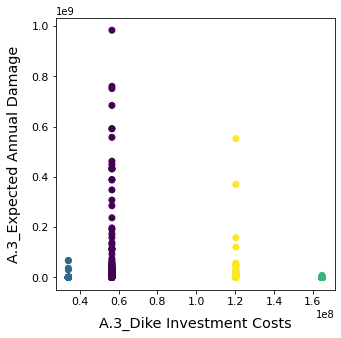

In [34]:
#--- Code used for all scatterplots

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

experiments, outcomes = results

fig, axs = plt.subplots(1, figsize=(5, 5))

#comment out what you don't need and adapt labels to your plot (ALSO CHANGE THE NAME OF THE FIGURE IN SAVEFIG)

axs.set_ylabel('A.3_Expected Annual Damage', fontsize = 'x-large', labelpad = 10)
axs.set_xlabel('A.3_Dike Investment Costs', fontsize = 'x-large', labelpad = 10)
axs.scatter(outcomes['A.3_Dike Investment Costs'], outcomes['A.3_Expected Annual Damage'], c=experiments.policy)
#axs.scatter(outcomes['A.3_Dike Investment Costs'], outcomes['A.3_Expected Number of Deaths'],c=experiments.policy)
#axs.scatter(outcomes['A.3_Expected Annual Damage'], outcomes['A.3_Expected Number of Deaths'], c=experiments.policy, cmap = 'viridis')



plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.savefig("Zutphen Deaths over Damage", dpi = 200, bbox_inches='tight')


plt.show()


In [93]:
#--- finding scenarios with maximum deaths for every dike ring
worst_A1 = np.where(outcomes1['A.1_Expected Number of Deaths'] == np.amax(outcomes1['A.1_Expected Number of Deaths']))
experiments1.loc[worst_A1]
worst_A2 = np.where(outcomes1['A.2_Expected Number of Deaths'] == np.amax(outcomes1['A.2_Expected Number of Deaths']))
experiments1.loc[worst_A2]
worst_A3 = np.where(outcomes1['A.3_Expected Number of Deaths'] == np.amax(outcomes1['A.3_Expected Number of Deaths']))
experiments1.loc[worst_A3]
worst_A4 = np.where(outcomes1['A.4_Expected Number of Deaths'] == np.amax(outcomes1['A.4_Expected Number of Deaths']))
experiments1.loc[worst_A4]
worst_A5 = np.where(outcomes1['A.5_Expected Number of Deaths'] == np.amax(outcomes1['A.5_Expected Number of Deaths']))
experiments1.loc[worst_A5]

1244636331.368936 1016788339.7943811 1066035233.9267205 161313433.39350668 336281883.9224575


,A.1_Damage,A.2_Damage,A.3_Damage,A.4_Damage,A.5_Damage
9,1.244636e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
821,0.000000e+00,3.493757e+08,0.000000e+00,0.000000e+00,0.000000e+00
564,0.000000e+00,0.000000e+00,1.066035e+09,0.000000e+00,0.000000e+00
652,0.000000e+00,0.000000e+00,0.000000e+00,1.613134e+08,0.000000e+00
545,0.000000e+00,0.000000e+00,1.463709e+07,2.399229e+05,3.062466e+08


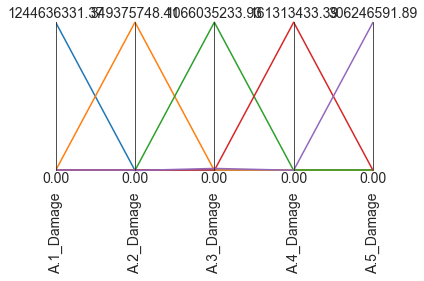

<Figure size 2800x480 with 0 Axes>

In [94]:
#--- Code for all parallel coordinate plots
from ema_workbench.analysis import parcoords

experiments1, outcomes1 = results#1
df = pd.DataFrame(outcomes1)

# if plotting Zutphen outcomes only
#safety_all = {key:outcomes1[key] for key in ['A.3_Expected Number of Deaths','A.3_Expected Annual Damage','Expected Evacuation Costs']}

# if plotting deaths in each dike ring
#safety_all = {key:outcomes1[key] for key in ['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths','A.3_Expected Number of Deaths','A.4_Expected Number of Deaths','A.5_Expected Number of Deaths']}

# if plotting damage in each dike ring
safety_all = {key:outcomes1[key] for key in ['A.1_Expected Annual Damage','A.2_Expected Annual Damage','A.3_Expected Annual Damage','A.4_Expected Annual Damage','A.5_Expected Annual Damage']}

data = df.loc[:, [o for o in safety_all.keys()]]

# If only plotting over the worst case scenario for deaths in each dike ring
data = data.loc[[worst_A1[0][0], worst_A2[0][0], worst_A3[0][0], worst_A4[0][0], worst_A5[0][0]],:]


# Making the names shorter for a better graph
data.rename(columns = {'A.1_Expected Number of Deaths':'A.1_Deaths',
                       'A.2_Expected Number of Deaths':'A.2_Deaths',
                       'A.3_Expected Number of Deaths':'A.3_Deaths',
                       'A.4_Expected Number of Deaths':'A.4_Deaths',
                       'A.5_Expected Number of Deaths':'A.5_Deaths',
                       'A.3_Expected Annual Damage':'A.3_Damage',
                       'A.1_Expected Annual Damage':'A.1_Damage',
                       'A.2_Expected Annual Damage':'A.2_Damage',
                       'A.3_Expected Annual Damage':'A.3_Damage',
                       'A.4_Expected Annual Damage':'A.4_Damage',
                       'A.5_Expected Annual Damage':'A.5_Damage',
                       'Expected Evacuation Costs':'Evacuation Costs'
                       }, 
                       inplace = True)


limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
plt.figure(figsize=(35, 6), dpi=80)
paraxes.plot(data)